### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

<AxesSubplot:xlabel='average', ylabel='Count'>

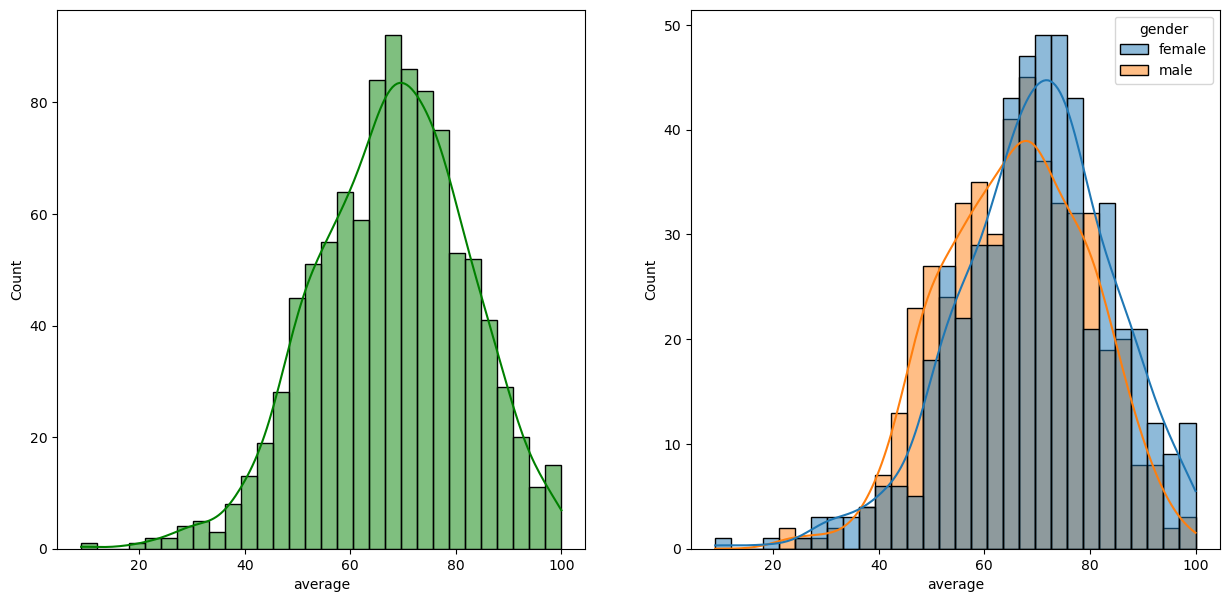

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read the dataset
df=pd.read_csv(r"D:\Data sets\stud.csv")

#segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

## Aggregate the total score with mean

df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['average']=df['total_score']/3

### Explore More Visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

# Insights
Female student tend to perform well than male students

<AxesSubplot:xlabel='average', ylabel='Count'>

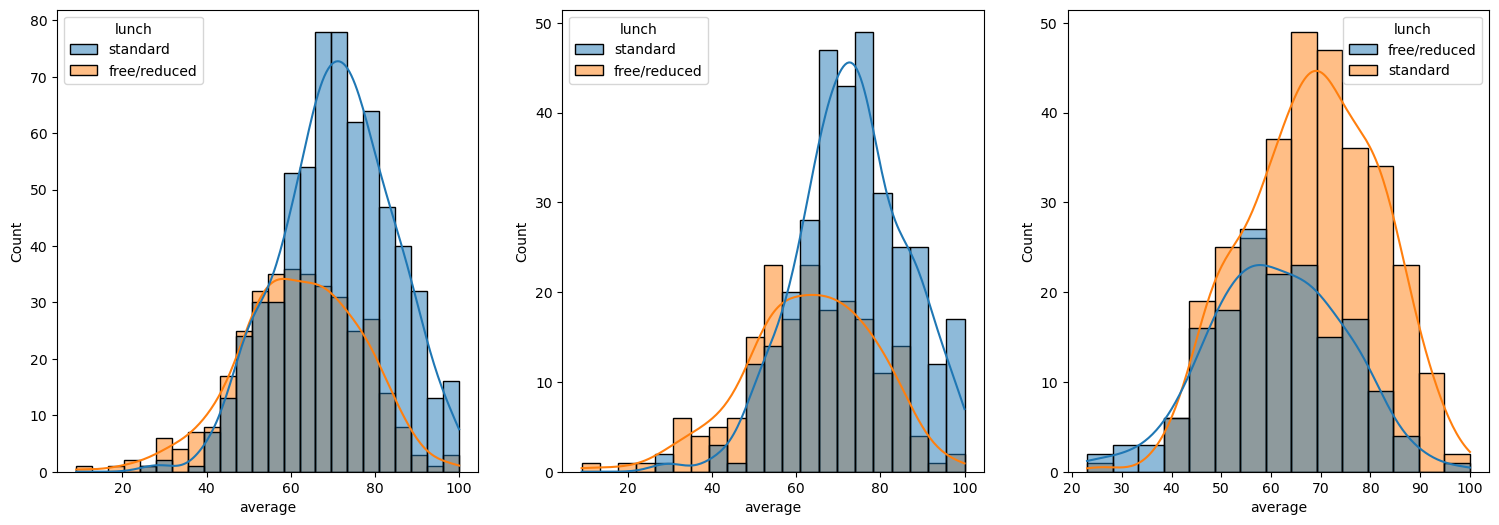

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

# Insights
Standard Lunch help students perform well in exams
Standard lunch helps perform well in exams be it a male of female

<AxesSubplot:>

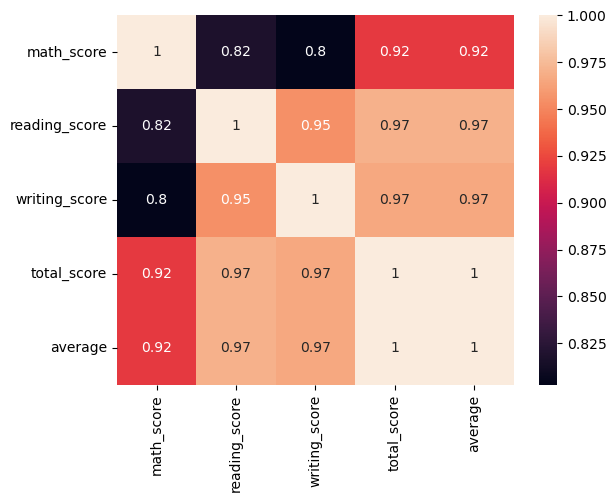

In [21]:
sns.heatmap(df.corr(),annot=True)

### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

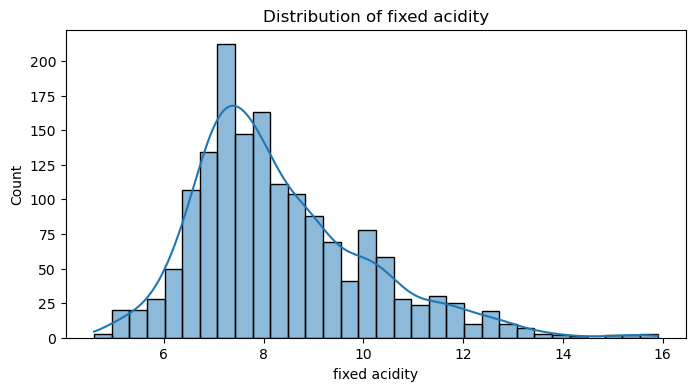

fixed acidity does not follow a normal distribution (p-value: 1.5227779442162196e-24)


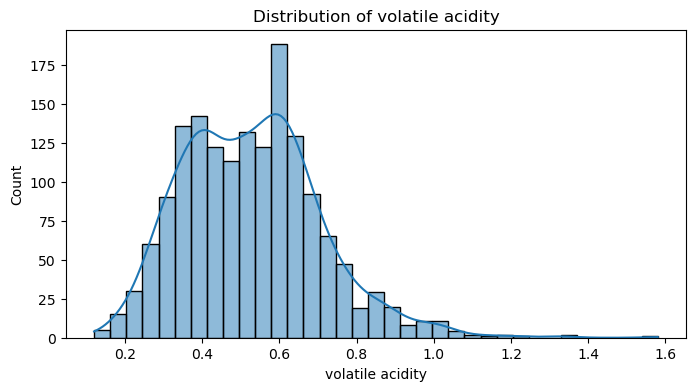

volatile acidity does not follow a normal distribution (p-value: 2.686385373947307e-16)


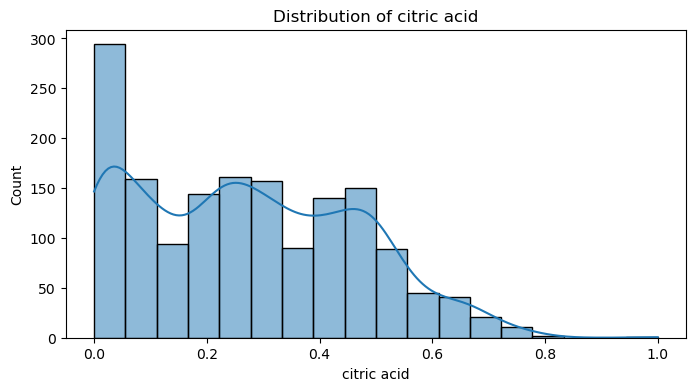

citric acid does not follow a normal distribution (p-value: 1.0233944777578548e-21)


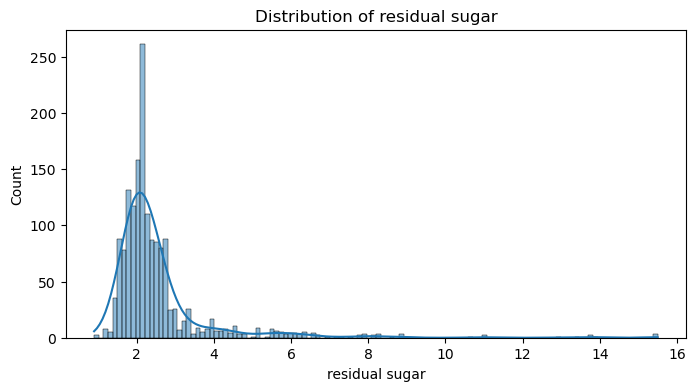

residual sugar does not follow a normal distribution (p-value: 0.0)


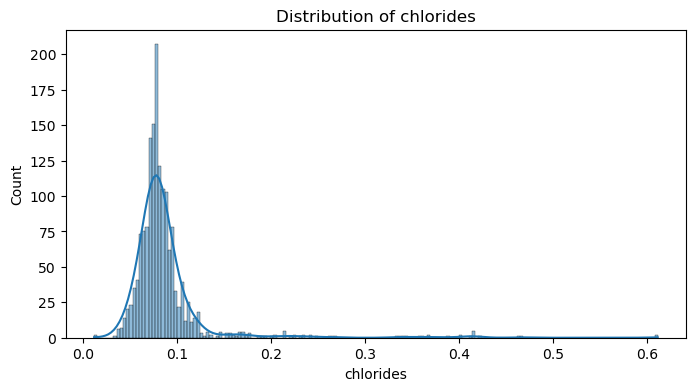

chlorides does not follow a normal distribution (p-value: 0.0)


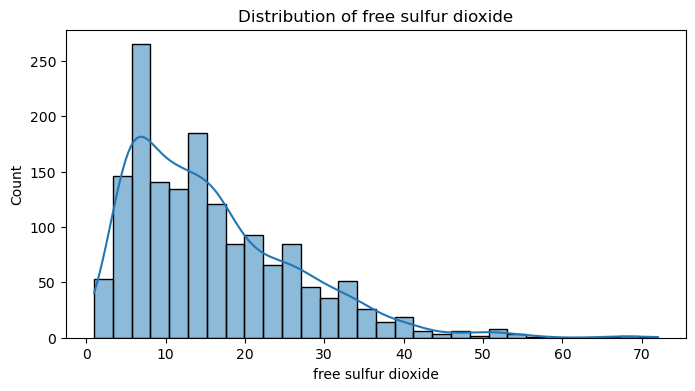

free sulfur dioxide does not follow a normal distribution (p-value: 7.699692533903026e-31)


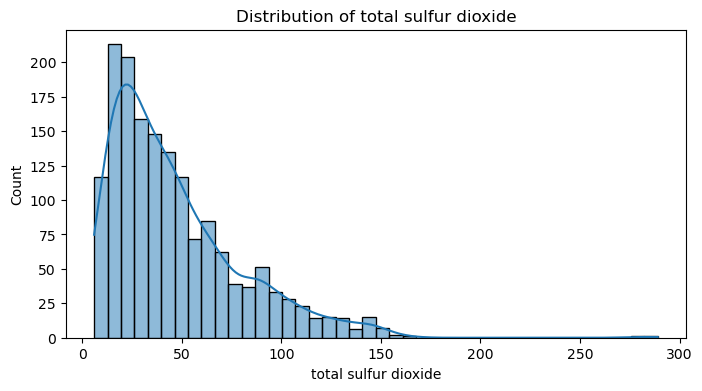

total sulfur dioxide does not follow a normal distribution (p-value: 3.573768919849872e-34)


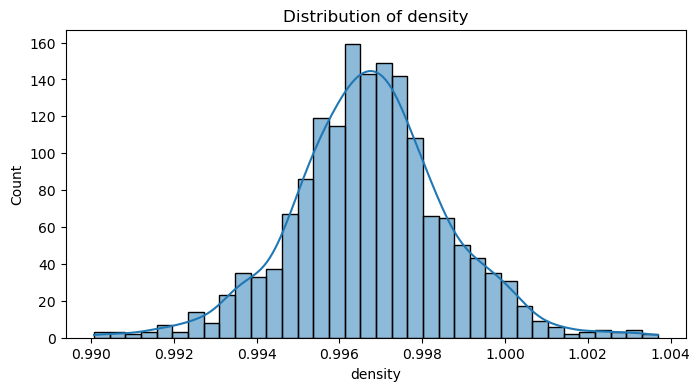

density does not follow a normal distribution (p-value: 1.9199848821926935e-08)


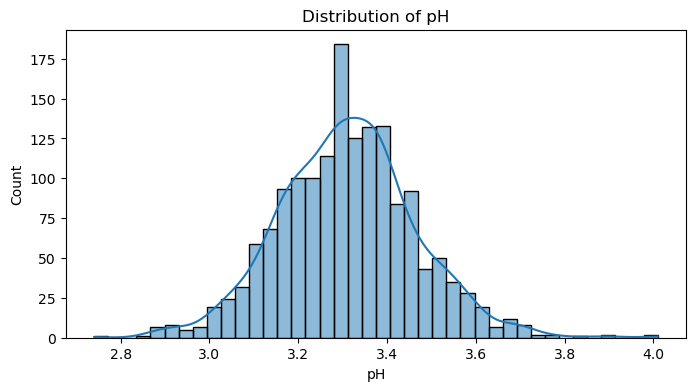

pH does not follow a normal distribution (p-value: 1.7218767425219994e-06)


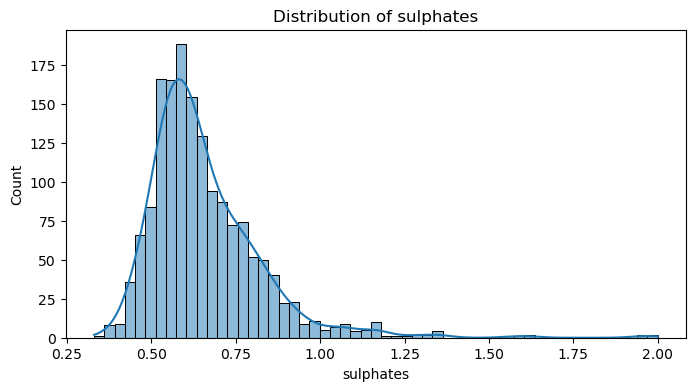

sulphates does not follow a normal distribution (p-value: 5.821617678881608e-38)


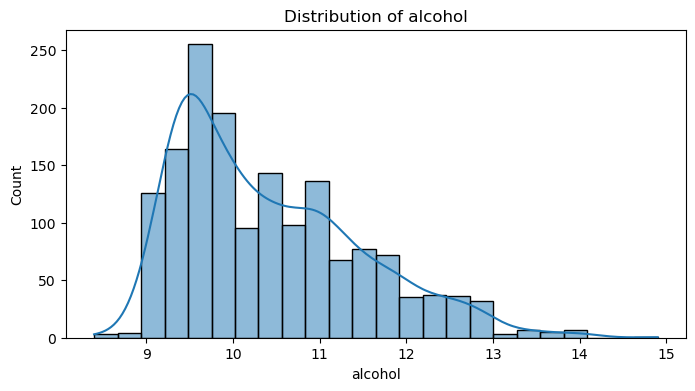

alcohol does not follow a normal distribution (p-value: 6.63998167657323e-27)


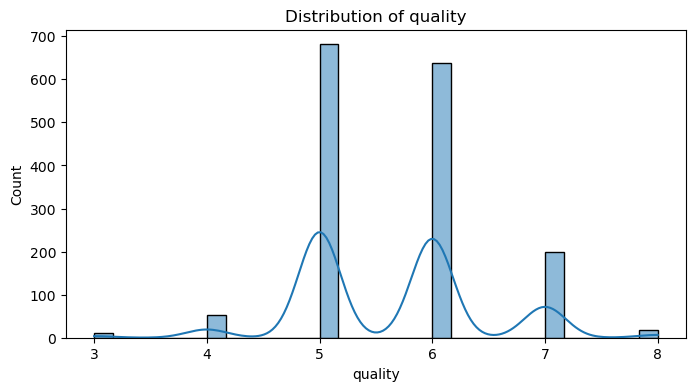

quality does not follow a normal distribution (p-value: 9.524199756965729e-36)


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv(r"D:\Data sets\winequality-red.csv")

# Perform EDA and analyze feature distributions
for feature in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()
    
    # Perform Shapiro-Wilk test for normality
    p_value = stats.shapiro(df[feature])[1]
    alpha = 0.05
    
    if p_value < alpha:
        print(f"{feature} does not follow a normal distribution (p-value: {p_value})")
    else:
        print(f"{feature} follows a normal distribution (p-value: {p_value})")


### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"D:\Data sets\winequality-red.csv")

x = df.drop(['quality'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)


pca = PCA()
pca.fit(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("Minimum number of principal components to explain 90% of variance:", num_components)

Minimum number of principal components to explain 90% of variance: 9
